In [585]:
import numpy as np
import IPython
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
#import matplotlib.cm as cm
import pandas as pd
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Results from experiment F98: SQUIDs and Noise Thermometers

#### Authors: Huth, Paris and Coc, Q'inich

## 5.1 Preparation

In this part of the experiment, we measure the resistance $R$ of $\pm V$, $\pm \phi$, $\pm \phi_X$ and $\pm I$ for channel 1 and chanel 2 at two temperatures. Room temperature $T_{room}$ and the temperature in liquid helium $T_{He}$.  Chanel two is connected to a single stage SQUID while Channel 2 is Connected to a two-stage SQUID. 

Tab. 1: Resistance of Channel 1
| Channel 1    | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | 364.0                    | 8.7                    |
| $\pm \phi$   | O.L                      | O.L                    |
| $\pm \phi_X$ | 259.0                    | 6.9                    |
| $\pm I$ | O.L                      | O.L                     

    |



Tab. 2 Resistance of Channel 2

| Channel 2   | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | N.A                       | 56.9                   |
| $\pm \phi$   | N.A                       | 7.4                    |
| $\pm \phi_X$ | N.A                       | 8.1                    |
| $\pm I$      | N.A                       | 7.1                   |

Since Channel 1 is only a single-stage SQUID the the value for $\pm \phi$ and $\pm I$ are not defined. From the values displayed in Tab. 1 it becomes clear, that the resistance decreases significantly - 97.6% in the case of  $\pm V$ and 99.97% for $\pm \phi_X$. 

During the experiment there were some misunderstanding and we didn't measure the resistance of Channel 2 at room temperature. Regardless, we can assume the values between Channel 1 and Chanel 2 to be of the same magnitude. With this assumption, we can conclude that the resistance drops drastically at low temperatures, see Tab. 2, and the reduction should be similar to the one observed for Channel 1.

Both observations fall within our expectations. From the theory of super conductors, we expect the resistance to tend to zero $R \to 0$ for $T \to T_{critical}$. However, in our experimental set-up we deal with a non-ideal scenario, since the cables used to take the measurements have a resistance themselves. Consequently, the resistance does not reach 0, but drops substantially compared to the initial value $R\left(T_{room}\right)$. 


## 5.2 Single Stage SQUID

### 5.2.1 Open Loop

Throughout this part we will work with a single stage SQUID and study its properties. In this part, we focus in the current-voltage characteristic in the open loop setting. In Fig. 1 we present a screenshot of the signal measured with $\texttt{PicoScope}$ and the parameters used for the measurement. 

Fig. 1: Measured current-voltage characteristic
![Measured current-volta characteristic](Measurements/5.2/V_I_Ib=50.png)


From this measurements we aim to find the critical current $I_c$ which characterize the current at which breaks the Cooper-pais inside of the super conductor leading to the normal conducting behaviour of the material.  Additionally, we are interested to estimate the resistance of a normal conducting Josephson junction. We utilze the
fact, that a normal conducting Josephson junction follows Ohm's law:

$$U(I) = G_N I$$

For this reason, we performe a linear fit along the linear range of the voltage-current characteristic to determine the normal resistance $G_N$.

In [685]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.2/V_I_Ib=50/V_I_Ib=50_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A    Channel B
            (ms)          (V)         (mV)
0  -100,00896454  -0,17375120  63,17667000
1  -100,00080454  -0,17375120  59,22428000
2   -99,99264454  -0,17375120  55,27190000
3   -99,98448454  -0,17375120  59,22428000
4   -99,97632454  -0,17375120  55,27190000

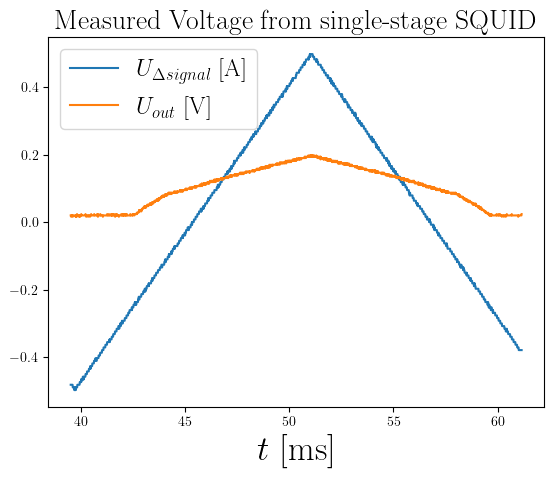

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 0.0199


In [698]:
#Convert values into floats
%matplotlib inline
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
current= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]

signal = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal = signal/1000 #V

t_i = 17100
t_f = 19750
plt.plot(time1[t_i:t_f],current[t_i:t_f], label =r"$U_{\Delta signal}$ [A]")
plt.plot(time1[t_i:t_f],signal[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Measured Voltage from single-stage SQUID", fontsize =20)
#plt.ylabel(r"$I$ [A]", fontsize = 20)
plt.xlabel(r"$t$ [ms]", fontsize = 25)

plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(current[t_i:t_f]), np.min(current[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(current[t_i:t_f]) -np.min(current[t_i:t_f])))
print(r"R = {:.3}".format((np.max(current[t_i:t_f]) -np.min(current[t_i:t_f]))/50))

We passed a triangular current voltage with peak-to-peak $50$ $\mu$A. From the measured voltage generated by the in-put current, we measure $U_{peak-to-peak} = 0.995$ v. Using Ohm'w law, we find $R = 0.0199$ M$\Omega$. For the rest of the analysis we thus multiplied the measured voltage from channel 1 with $R$. In order to get the right scale, it is important to consider the $1/2$ offset of the input signal. Additionally, we have to consider the fact that the output signal $U_{out}$ is being amplified by a factor of $2000$. After making these changes to the measurements we are able to plot the voltage-current characteristic of the single-stage SQUID in the open loop mode.

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\magnu\AppData\Local\Temp\ipykernel_24584\4017071881.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(title = "$I_c$ = {:.3} $\mu$A".format(current[17670]), fontsize='xx-large', loc = 'best', title_fontsize='xx-large')


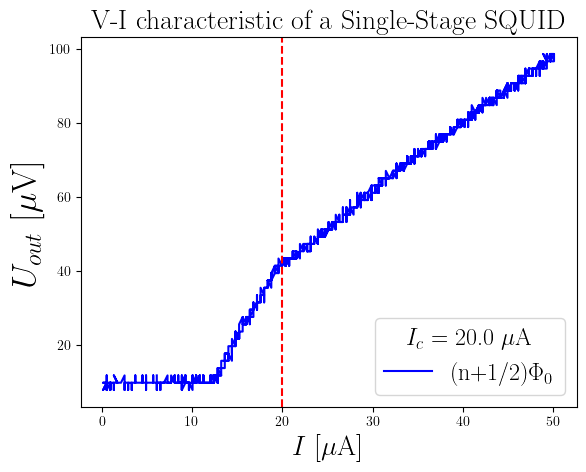

In [702]:
t_i = 17100
t_f = 19750
R = 0.995/50e-6  #Ohm 
a = 2000 # Verstärkung
current = (current + 0.5*np.ones_like(current))/R*10**6 #muA
signal = signal/a*10**6 #muV
plt.plot(current[t_i:t_f],signal[t_i:t_f], label = r"(n+1/2)$\Phi_0$", color = "blue")
plt.axvline(current[17670], ls = '--', color='red')
plt.title(r"V-I characteristic of a Single-Stage SQUID", fontsize =20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$U_{out}$ [$\mu$V]", fontsize = 25)
plt.legend(title = "$I_c$ = {:.3} $\mu$A".format(current[17670]), fontsize='xx-large', loc = 'best', title_fontsize='xx-large')
plt.show()

After estimating the linear range of the U-I curve, we move on and perform a fit using the $\texttt{Minuit}$ package. Since the measured data-set lacks from uncertainties, we assume that all residues are equally weighed, i.e. $\sigma = 1$ for all data-points.

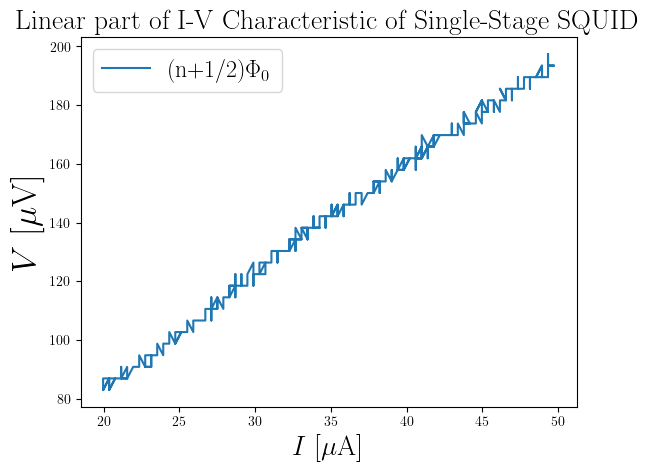

In [710]:
# plot signal
t_i = 17670
t_f = 18500
plt.plot(current[t_i:t_f],signal1[t_i:t_f], label =r"(n+1/2)$\Phi_0$")
plt.title(r"Linear part of I-V Characteristic of Single-Stage SQUID", fontsize=20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$V$ [$\mu$V]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [706]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
current_fit = current[t_i:t_f]
signal_fit = signal1[t_i:t_f]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t0+t1*x

chi_2 = cost.LeastSquares(current_fit, signal_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=103, t1=1.9)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3626 (χ²/ndof = 4.4)       │              Nfcn = 63               │
│ EDM = 4.6e-17 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   8.82    │   0.14    │   -0.14    │    0.14    │         │         │       │
│ 1 │ t1   │   3.776   │   0.004   │   -0.004   │   0.004    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.14   │   0.14    │  -0.004   │   0.004   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────┐
│    │        t0        t1 │
├────┼─────────────────────┤
│ t0 │    0.0207 -0.562e-3 │
│ t1 │ -0.562e-3  1.62e-05 │
└────┴─────────────────────┘

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_24584\3970708244.py:10: SyntaxWarning: invalid escape sequence '\p'
  label='linear Fit: \n $R$ = ({:.3f} $\pm$ 0.004) $\Omega$ '.format(t1_fit),


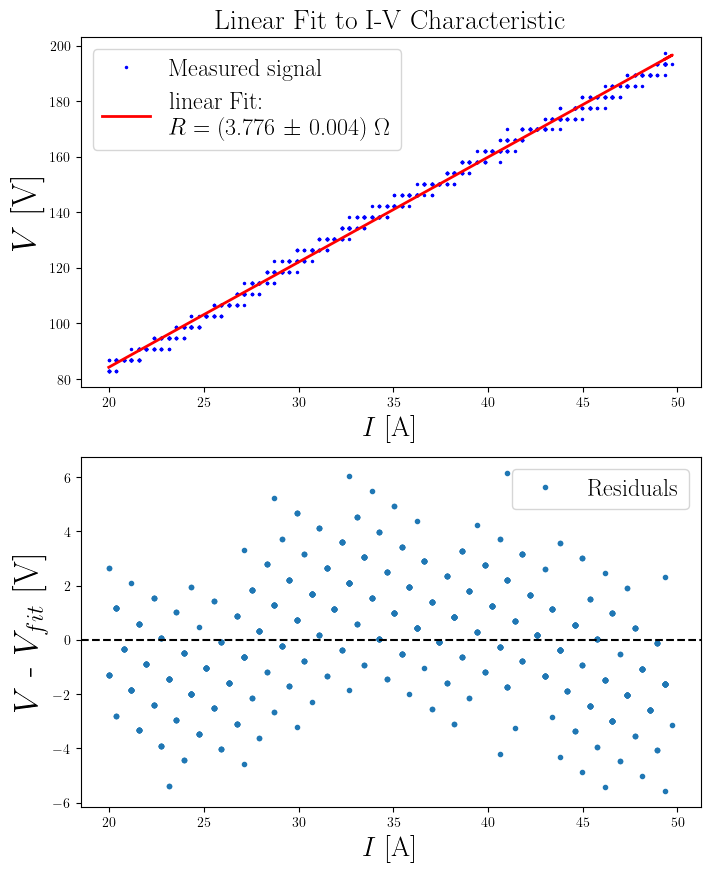

In [712]:
# Plot the data and the fitted model
import matplotlib.pyplot as plt
%matplotlib inline
t0_fit, t1_fit = minuit.values['t0'], minuit.values['t1']
fig, axs = plt.subplots(2, 1, figsize=(8,10))


axs[0].plot(current_fit, signal_fit,'b.', markersize=3, label = "Measured signal")
axs[0].plot(current_fit, linear(current_fit, t0_fit, t1_fit), '-', 
            label='linear Fit: \n $R$ = ({:.3f} $\pm$ 0.004) $\Omega$ '.format(t1_fit), 
            linewidth=2, color = "red")
axs[0].set_title(r"Linear Fit to I-V Characteristic", fontsize=20)
axs[0].set_xlabel(r"$I$ [A]", fontsize = 20)
axs[0].set_ylabel(r"$V$ [V]", fontsize=25)
axs[0].legend(fontsize='xx-large', loc='best')
#axs[0].grid(True)


#plot residuals
residuals = signal_fit - linear(current_fit, t0_fit, t1_fit)
axs[1].plot(current_fit, residuals, 'o', label="Residuals", markersize=3)
axs[1].axhline(0, color='black', linestyle='--')
#axs[1].set_title("Residuals of the Linear Fit", fontsize=20)
axs[1].set_xlabel(r"$I$ [A]", fontsize = 20)
axs[1].set_ylabel(r"$V$ - $V_{fit}$ [V]", fontsize=25)
axs[1].legend(fontsize='xx-large', loc='best')
#axs[1].grid(True)
plt.show()

We find that the resistance of a normal conducting Josephson Junction is:
$$G_N = ( 3.776 \pm 0.004)\, \Omega $$

Additionally, we find the critical current to be $$I_c = 20\,\,\mu\textrm{A}$$

In the next part of the experiment, we measure the voltage-flux characteristics of the single stage SQUID remaning in the open loop set-up. In Fig. 2 we present the measured singal for $\Phi_B$ and $\Phi_x$ along with the parameters we use to take the measurement. Here, $I_B$ is selected to maximaze the voltage swing (in $\mu$V) and $V_{B}$ to center the signal $V_{out}$ around 0 V. 

Fig. 2: Signal measured for (left) $V-\Phi_X$ characteristic and (right) Measured $V-\Phi_B$ characteristic and their parameters.
<div>
    <img src="Measurements/5.2/V_PhiX_max.png" alt="V_PhiB_Max.png"  width="45%" />
    <img src="Measurements/5.2/V_PhiB_Max.png" alt="V_PhiB_Max.png"  width="45%" />
</div>v>


From the measured characteristics we aim to determine the inverse mutual inductance $M_{IN}^{-1}$,  $M_{\Phi_X}^{-1}$ and $M_{\Phi_B}^{-1}$. For this we use the know relations in Eq. 48 form the lab introduction. 
$$\Delta \Phi_i = I_i \cdot M$$
By measuring the difference between neighbouring flux quanta we get the relation:
$$M^{-1} = \frac{\Delta I_i}{\Phi_0}$$

From the measured flux-voltage characteristic we can find the voltage swing between the minima and maxima, which represent the flux change of one flux quantum $\Phi_0  = 2.067 \cdot 10^{-15}$ Vs. 

In [726]:
phi_0 = 2.067e-15 #Vs

In [1289]:
#create a dataframe of saves file using pandas
data_phi = pd.read_csv("Measurements/5.2/V_PhiB/V_PhiB_1.csv", sep = ";", skiprows=[2], header=[0,1])
data_phi.head()

Time    Channel A    Channel B
           (ms)          (V)         (mV)
0  -23,85100722  -0,11844860  -4,75055300
1  -23,84895922  -0,11844860  -4,35531500
2  -23,84691122  -0,11844860  -3,95853800
3  -23,84486322  -0,11844860  -4,35531500
4  -23,84281522  -0,11844860  -4,75055300

In [1291]:
data_phix = pd.read_csv("Measurements/5.2/V_PhiX_1/V_PhiX_1.csv", sep = ";", skiprows=[2], header=[0,1])
data_phix.head()

Time    Channel A    Channel B
           (ms)          (V)         (mV)
0  -95,40671855  -0,42645790  13,85796000
1  -95,39855855  -0,42645790  14,25320000
2  -95,39039855  -0,42645790  14,25320000
3  -95,38223855  -0,42645790  14,25320000
4  -95,37407855  -0,42645790  15,44199000

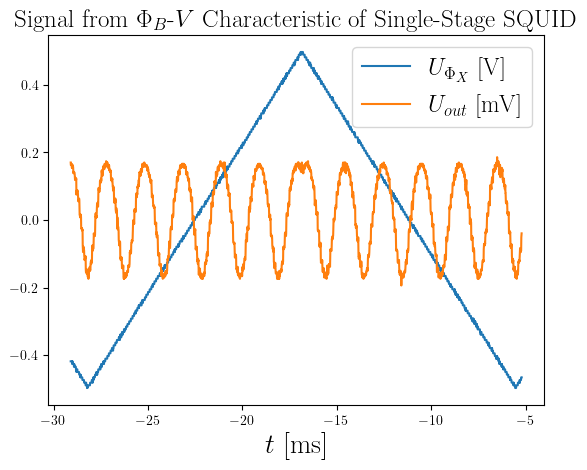

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 0.00829


In [1293]:
%matplotlib inline
#Convert values into floats
time_X = data_phix.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_X= data_phix.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_X = data_phix.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal_X = signal_X/100#V

t_i = 8126
t_f = 11055
plt.plot(time_X[t_i:t_f],flux_X[t_i:t_f], label =r"$U_{\Phi_X}$ [V]")
plt.plot(time_X[t_i:t_f],signal_X[t_i:t_f], label =r"$U_{out}$ [mV]")
plt.title(r"Signal from $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", fontsize =18)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(flux_X[t_i:t_f]), np.min(flux_X[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(flux_X[t_i:t_f]) -np.min(flux_X[t_i:t_f])))
print(r"R = {:.3}".format((np.max(flux_X[t_i:t_f]) -np.min(flux_X[t_i:t_f]))/120))

Since we are interested in the change of flux given by a change in current we perfome the same calculations to transform the input voltage into the applied current. Here, it is essential to consider the amplification of the output signal and the offset of the input current. 

We know that the distance $\Delta t$ from maxima to maxima is the time change of an increase in a flux quanta, since we are interested to measure the change of flux in multiples of $\Phi_0$ we normalize the x-axis in our following plots. This normalization represent a affine transformation:
$$ x \to x' = x/\Delta t.$$
Since, both the input current and the output voltage are functions of the transformed x-axis we apply the respective transformation formula:
$$f(x) \to \Delta t \cdot f(x').$$


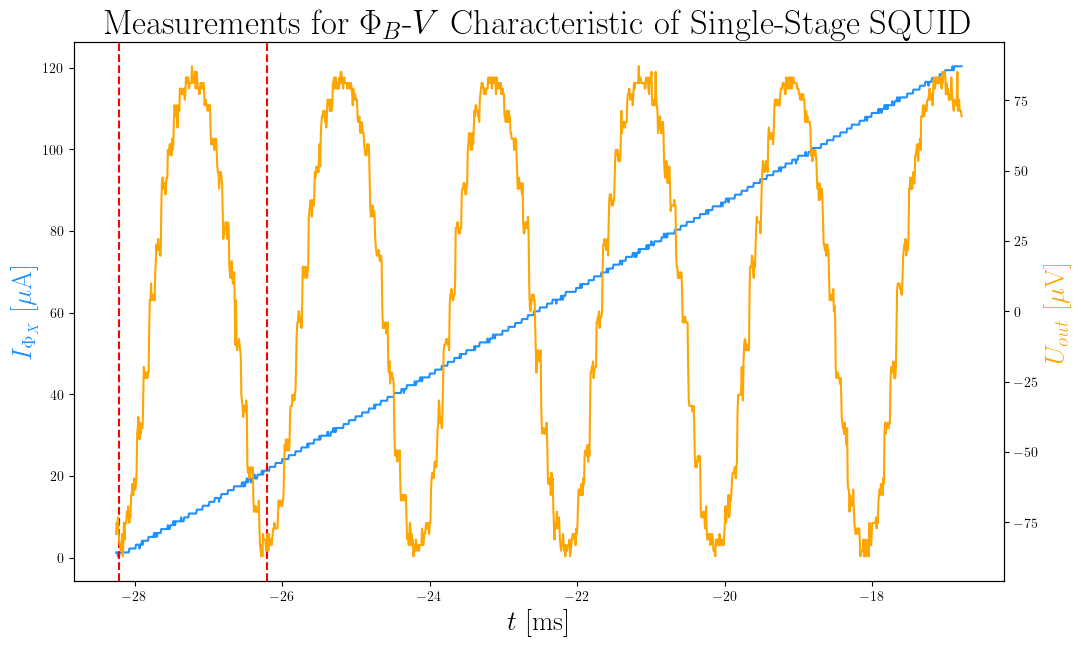

In [1296]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
t_i = 8230
t_f = 9635

R = 0.995/120e-6 #Ohm
current = (flux_X + 0.5*np.ones_like(flux_X))/R*10**6
#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_X[t_i:t_f], 2)[:2]
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] #shift the found values to match the position
#of the minima visually. 
dt_X  = t_2 - t_1 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measurements for $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_X[t_i:t_f],current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')

ax.set_xlabel(r'$t$ [ms]', size = 20)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 20, color="dodgerblue")
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_X[t_i:t_f],signal_X[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")

plt.show()

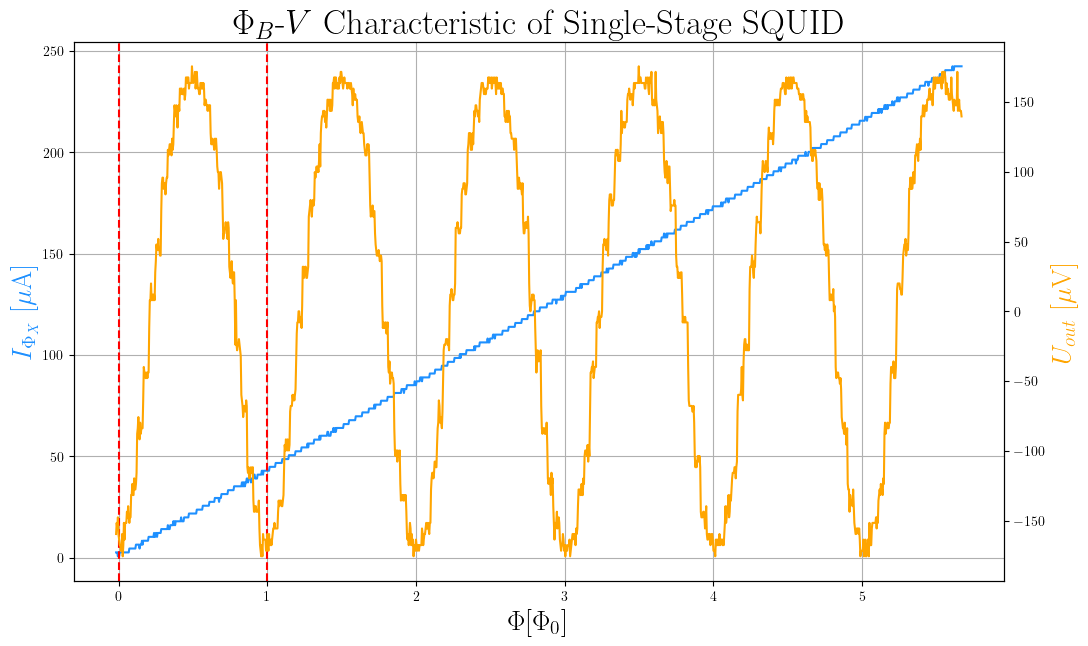

5.672066090417699


In [1298]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
t_i = 8230
t_f = 9635

R = 0.995/120e-6 #Ohm

#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_X[t_i:t_f], 2)[:2]
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
dt_X  = t_2 - t_1 
time_X = time_X/dt_X #normalize x-Axis
time_X = time_X +14 #shift x-axis to center signal around 0
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"$\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_X[t_i:t_f],dt_X*current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')
ax.grid()

ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 20)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 20, color="dodgerblue")
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_X[t_i:t_f],dt_X*signal_X[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")

plt.show()
print(time_X[t_f])

Now, using Eq. 47 can determine the inverse mutual inductace with a linear fit to $I(\Phi)$. We do this once again using Minuit and assuming $\sigma = 1$ for all data points.

In [1073]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
time_fit = time_X[t_i:t_f]
current_fit = dt_X*current[t_i:t_f] 
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t1):
    return t1*x

chi_2 = cost.LeastSquares(time_fit, current_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t1=0)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 761.9 (χ²/ndof = 0.5)      │              Nfcn = 17               │
│ EDM = 6.12e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t1   │  43.101   │   0.008   │   -0.008   │   0.008    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          t1           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.008   │   0.008   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       t1 │
├────┼──────────┤
│ t1 │ 6.66e-05 │
└────┴──────────┘

From the fit we are able to determine:
$$M^{-1}_{\Phi_B} = (43.101\pm 0.008)\,\,\mu \textrm{A}\Phi_0^{-1} .$$

Next, we repeat the same procedure to estimate $M^{-1}_{IN}$. 

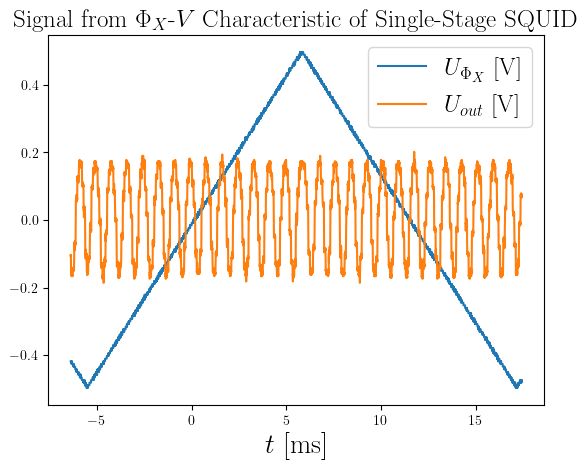

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 0.00829


In [1348]:
%matplotlib inline
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_B= data_phi.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_B = data_phi.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal_B = signal_B/100 #V

t_i = 8526
t_f = 20155
plt.plot(time_B[t_i:t_f],flux_B[t_i:t_f], label =r"$U_{\Phi_X}$ [V]")
plt.plot(time_B[t_i:t_f],signal_B[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Signal from $\Phi_X$-$V$ Characteristic of Single-Stage SQUID", fontsize =18)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(flux_B[t_i:t_f]), np.min(flux_B[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(flux_B[t_i:t_f]) -np.min(flux_B[t_i:t_f])))
print(r"R = {:.3}".format((np.max(flux_B[t_i:t_f]) -np.min(flux_B[t_i:t_f]))/120))

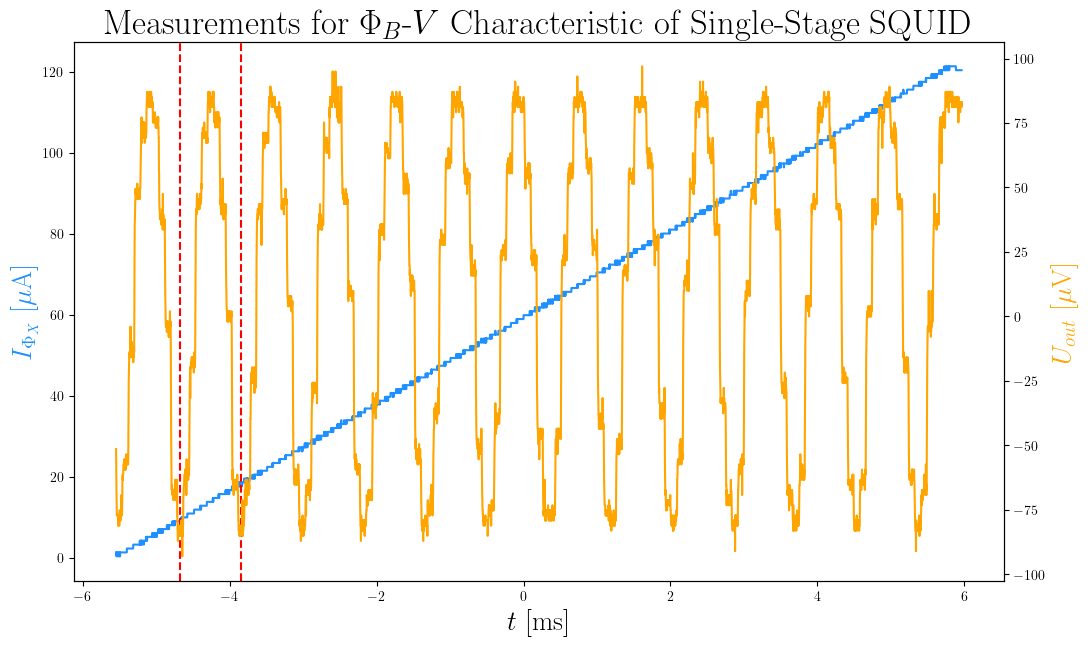

In [1350]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]

t_i = 8936
t_f = 14559

R = 0.995/120.98e-6 #Ohm
current = (flux_B + 0.5*np.ones_like(flux_B))/R*10**6
#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_B[t_i:t_f], 2)[:2]
t_1, t_2 = time_B[t_i -13+ min_ind[0]], time_B[t_i +392+ min_ind[0]] #shift the found values to match the position
#of the minima visually. 
dt_B  = t_2 - t_1 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measurements for $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_B[t_i:t_f],current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')

ax.set_xlabel(r'$t$ [ms]', size = 20)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 20, color="dodgerblue")


ax2 = ax.twinx()
ax2.plot(time_B[t_i:t_f],signal_B[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")
#plt.xlim(-5,0)
plt.show()

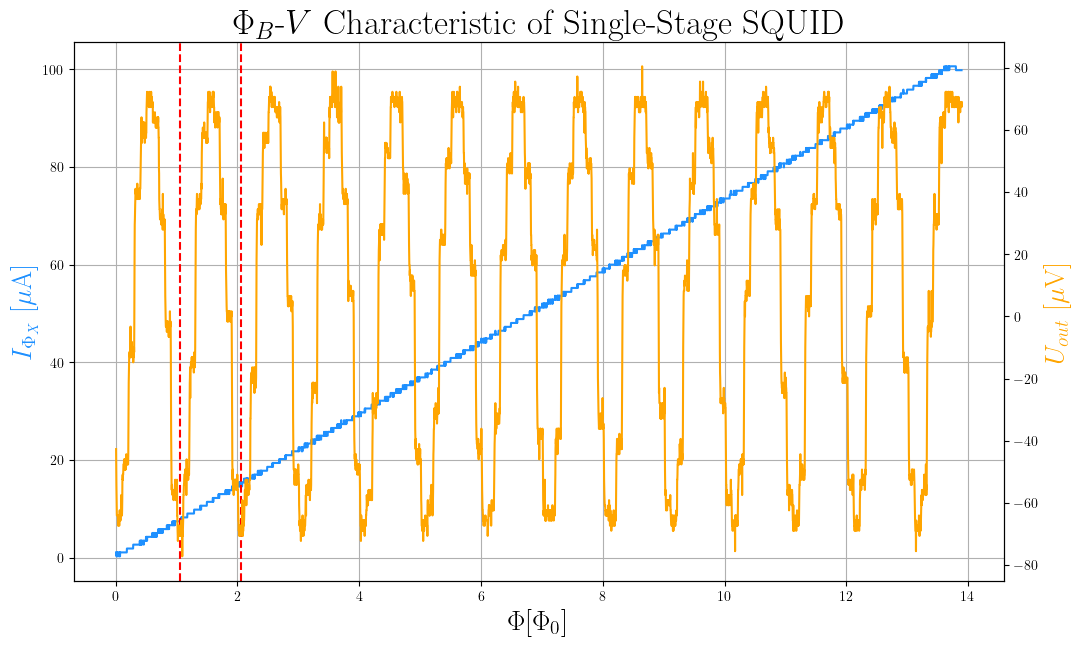

0.8294399800000001


In [1352]:
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
time_B = time_B/dt_B #normalize x-Axis
time_B = time_B+6.7
t_1, t_2 = time_B[t_i -13+ min_ind[0]], time_B[t_i +392+ min_ind[0]] #shift the found values to match the position

#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"$\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_B[t_i:t_f],dt_B*current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')
ax.grid()

ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 20)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 20, color="dodgerblue")
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_B[t_i:t_f],dt_B*signal_B[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")

plt.show()
print(dt_B)

In [1356]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
time_fit = time_B[t_i:t_f]
current_fit = dt_B*current[t_i:t_f] 
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t1):
    return t1*x

chi_2 = cost.LeastSquares(time_fit, current_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t1=0)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 580.5 (χ²/ndof = 0.1)      │              Nfcn = 17               │
│ EDM = 5.94e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t1   │  7.3385   │  0.0017   │  -0.0017   │   0.0017   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          t1           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.0017  │  0.0017   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       t1 │
├────┼──────────┤
│ t1 │ 2.76e-06 │
└────┴──────────┘

From the fit we are able to determine:
$$M^{-1}_{IN} = (7.3385\pm 0.0017)\,\,\mu \textrm{A}\Phi_0^{-1} .$$

### 5.2.2 Flux Locked Loop

In the next section of the experiment, we analyze the SQUID in the FLL mode. We measure the output voltage generated signal by a triangular signal. From this measurements, we aim to determine the amplification of the circuit using Eq. 50 of the lab's introduction:
$$ \Delta U_{out} = -R_F\frac{M_{IN}}{M_{\Phi_B}}\Delta I_{IN}.$$

Using this equation, we can estimate two values for the amplification, one graphically by fitting a linear function to voltage-current curve and taking the negative slope. To get a second value we can use the values we found in $5.2.1$. We start with the graphical method.

We transformt he measured voltage from channel A as we have done in the past. Afterwards, we use performe a linear fit to the U-I curve. 

In [1361]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.2/FLL_workingpoint/FLL_workingpoint_2.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A    Channel B
           (ms)          (V)          (V)
0  -95,40671855  -0,42645790  -0,04736713
1  -95,39855855  -0,42645790  -0,06317668
2  -95,39039855  -0,42645790  -0,06317668
3  -95,38223855  -0,42645790  -0,06317668
4  -95,37407855  -0,42645790  -0,06317668

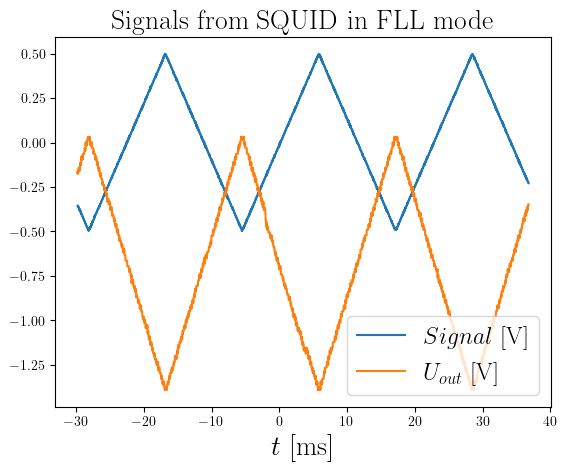

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 3.33e+05


In [1333]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
u_out = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [V]

signal = signal
t_i = 8039
t_f = 16201
plt.plot(time[t_i:t_f],signal[t_i:t_f], label =r"$Signal$ [V]")
plt.plot(time[t_i:t_f],u_out[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Signals from SQUID in FLL mode", fontsize =20)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(signal[t_i:t_f]), np.min(signal[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(signal[t_i:t_f]) -np.min(signal[t_i:t_f])))
print(r"R = {:.3}".format((np.max(signal[t_i:t_f]) -np.min(signal[t_i:t_f]))/2.99e-6))

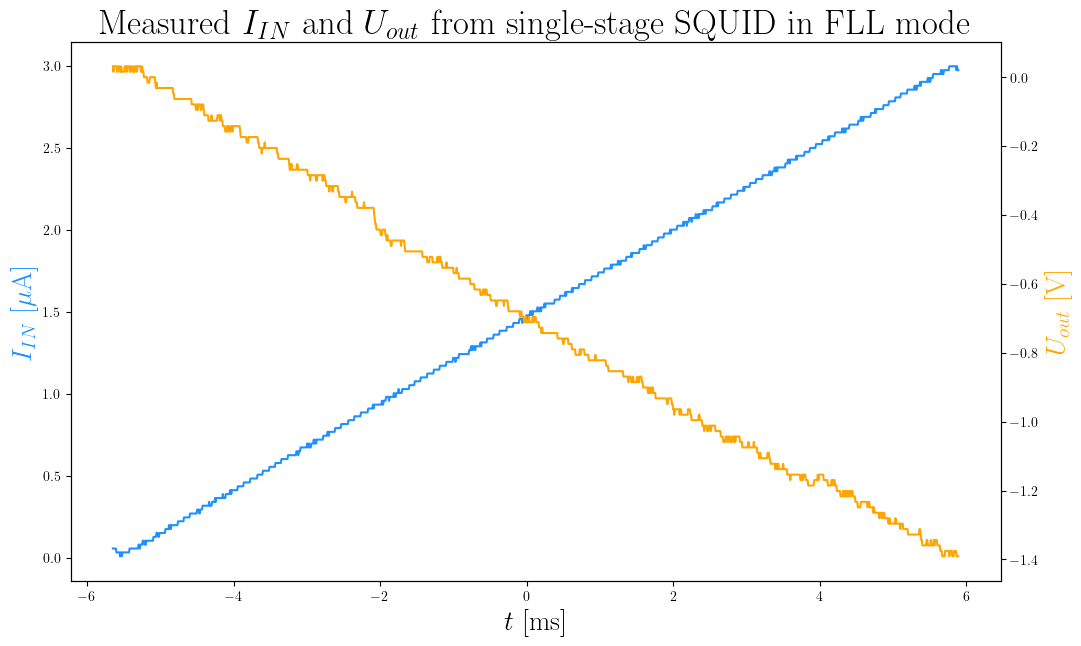

In [1420]:
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
R = 0.995/2.99e-6
current = (signal+0.5)/R*10**6 # mA
t_i = 11000
t_f = 12415

fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measured $I_{IN}$ and $U_{out}$ from single-stage SQUID in FLL mode", size = 25)
ax.plot(time[t_i:t_f],current[t_i:t_f], color="dodgerblue")


ax.set_xlabel(r'$t$ [ms]', size = 20)
ax.set_ylabel(r'$I_{IN}$ [$\mu$A]', size = 20, color="dodgerblue")


ax2 = ax.twinx()
ax2.plot(time[t_i:t_f],u_out[t_i:t_f], color="orange")
ax2.set_ylabel(r"$U_{out}$ [V]", size = 20, color="orange")
#plt.xlim(-5,0)
plt.show()

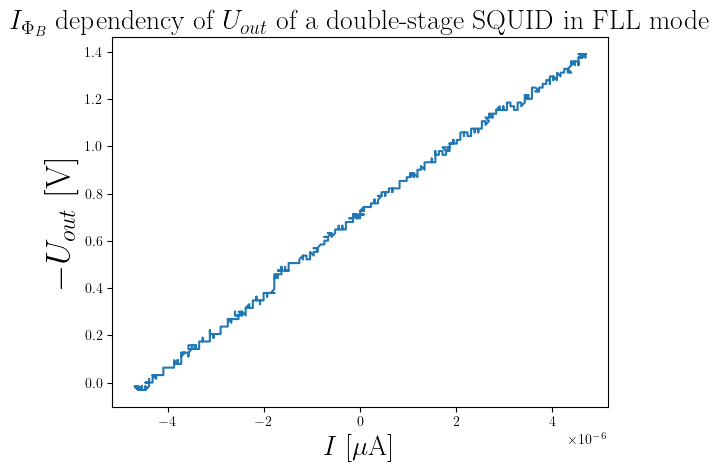

In [1457]:
r = 0.106e6
plt.plot(signal[t_i:t_f]/r,-u_out[t_i:t_f])
plt.title(r"$I_{\Phi_B}$ dependency of $U_{out}$ of a double-stage SQUID in FLL mode", fontsize =20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$-U_{out}$  [V]", fontsize = 25)
#plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [1426]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
current_fit = current[t_i:t_f]
u_fit = -u_out[t_i:t_f]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t0+t1*x

chi_2 = cost.LeastSquares(current_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=103, t1=1.9)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.721 (χ²/ndof = 0.0)      │              Nfcn = 64               │
│ EDM = 8.36e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   -0.03   │   0.05    │   -0.05    │    0.05    │         │         │       │
│ 1 │ t1   │   0.485   │   0.030   │   -0.030   │   0.030    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.05   │   0.05    │   -0.03   │   0.03    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │  0.00277  -1.4e-3 │
│ t1 │  -1.4e-3 0.000916 │
└────┴───────────────────┘

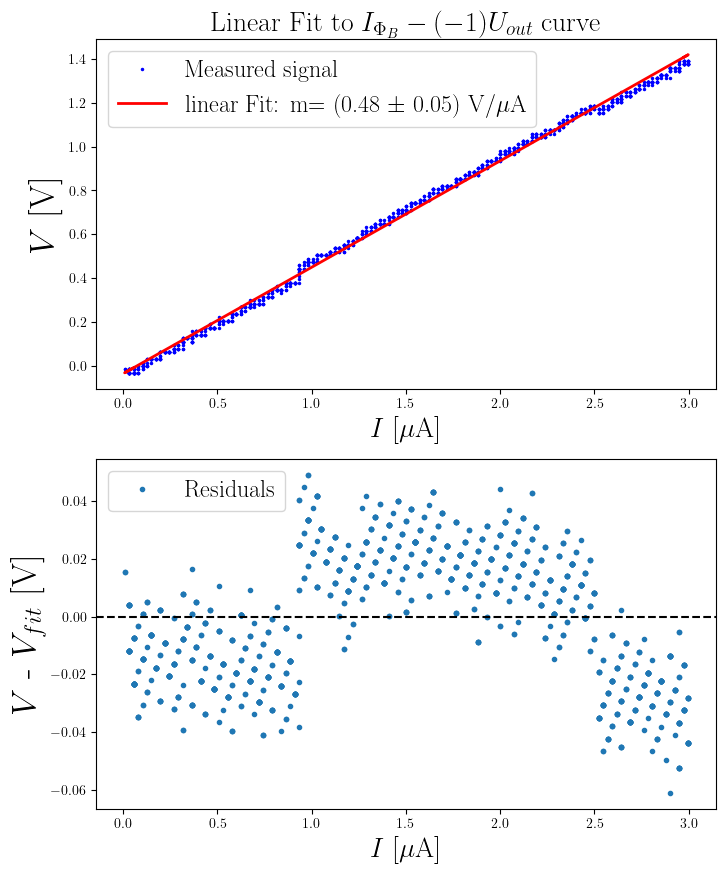

In [1471]:
# Plot the data and the fitted model
import matplotlib.pyplot as plt
%matplotlib inline
t0_fit, t1_fit = minuit.values['t0'], minuit.values['t1']
fig, axs = plt.subplots(2, 1, figsize=(8,10))


axs[0].plot(current_fit, u_fit,'b.', markersize=3, label = "Measured signal")
axs[0].plot(current_fit, linear(current_fit, t0_fit, t1_fit), '-', 
            label=r'linear Fit: m= ({:.2f} $\pm$ 0.05) V/$\mu$A'.format(t1_fit), 
            
            linewidth=2, color = "red")
axs[0].set_title(r"Linear Fit to $I_{\Phi_B}-(-1)U_{out}$ curve", fontsize=20)
axs[0].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[0].set_ylabel(r"$V$ [V]", fontsize=25)
axs[0].legend(fontsize='xx-large', loc='best')
#axs[0].grid(True)


#plot residuals
residuals = u_fit - linear(current_fit, t0_fit, t1_fit)
axs[1].plot(current_fit, residuals, 'o', label="Residuals", markersize=3)
axs[1].axhline(0, color='black', linestyle='--')
#axs[1].set_title("Residuals of the Linear Fit", fontsize=20)
axs[1].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[1].set_ylabel(r"$V$ - $V_{fit}$ [V]", fontsize=25)
axs[1].legend(fontsize='xx-large', loc='best')
#axs[1].grid(True)
plt.show()

Graphically we find $$m_{exp} = R_F\frac{M_{IN}}{M_{\Phi_B}} = (0.48\pm 0.05) \,\, V \mu\textrm{A}^{-1}$$

Now, we use the previously determined mutual inductances to estimate a second value of the amplification. From $\texttt{SQUISViwer}$ we read that our $R_F = 100$ k$\Omega$ = $0.1$ V/$\mu$A. Since no error explicitly given for this resistances we will disregard its contribution to the uncertainty. 

To determine a statistical error we use gaussian error propagation and assume that all variables in the definition of the amplification are uncorrelated. The error of the amplifcation reads:
$$ \Delta m = m\sqrt{\left(\frac{(\Delta M_{IN})_{err}}{\Delta M_{IN}}\right)^2 +\left(\frac{(\Delta M_{\Phi_B})_{err}}{\Delta M_{\Phi_B}}\right)^2 } $$ 



In [1520]:
m= 1/(7.3385)*43.101*0.1
dm =m*np.sqrt((0.008/43.101)**2+(0.0017/7.3385)**2)*0.1
print(r"m = {:.6f} $\pm$ {:.6f}".format(m,dm))
print(r" $\sigma$ = {:.3f}".format(np.abs(0.48-0.587327)/np.sqrt((0.05)**2+(0.000017)**2)))

m = 0.587327 $\pm$ 0.000017
 $\sigma$ = 2.147


From this second method, we get: $$m_{theo} = (0.587327\pm 0.000017) \,\, V \mu\textrm{A}^{-1}.$$

 The statistical deviation between both vales is: $$\sigma = 2.147.$$
 Thus the difference between both values lays within the confidence interval, \sigma

### 5.2.3 SQUID Noise

Lastly, we measure the noise spectrum in FLL mode while changing the the gain-bandwidth-production (GBP). We find out, that as the GBP increases, the spectrum develops resonances which tells uns that the stability of the signal is decreasing and the deviace is not able to take sensible measurements any longer. The resonances start to form at $GBP = 16$ GHz. 

Fig. 3: FLL Spectrum at $GBP = 3.30$ GHz
   <img src="Measurements/5.2/Spectrum.png" alt="Spectrum.png">

## 5.3 Two-stages SQUID Readout

In [517]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.3/V_PhiX/V_PhiX_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A     Channel C
           (ms)          (V)          (mV)
0  -95,40671855  -0,20533960  245,07870000
1  -95,39855855  -0,21321360  249,03110000
2  -95,39039855  -0,21321360  249,03110000
3  -95,38223855  -0,20533960  245,07870000
4  -95,37407855  -0,21321360  249,03110000

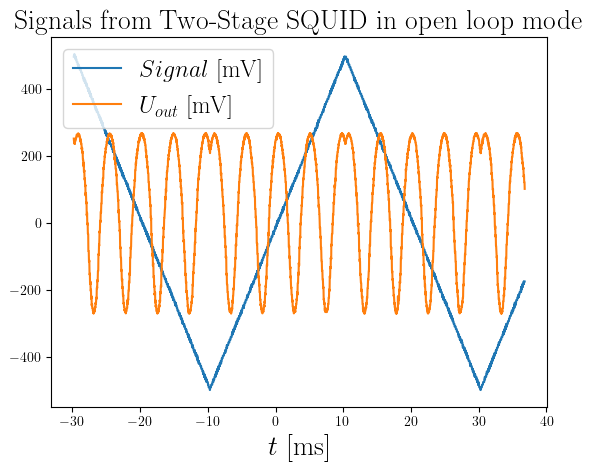

In [541]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
u_out = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]

t_i = 8039
t_f = 16201
plt.plot(time[t_i:t_f],signal[t_i:t_f]*1000, label =r"$Signal$ [mV]")
plt.plot(time[t_i:t_f],u_out[t_i:t_f], label =r"$U_{out}$ [mV]")
plt.title(r"Signals from Two-Stage SQUID in open loop mode", fontsize =20)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [543]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.3/V_Phix_bothSQUIDS_tunned/V_Phix_bothSQUIDS_tunned_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A     Channel C
           (ms)          (V)          (mV)
0  -95,40671855  -0,21321360  264,85600000
1  -95,39855855  -0,21321360  264,85600000
2  -95,39039855  -0,21321360  264,85600000
3  -95,38223855  -0,21321360  264,85600000
4  -95,37407855  -0,21321360  264,85600000

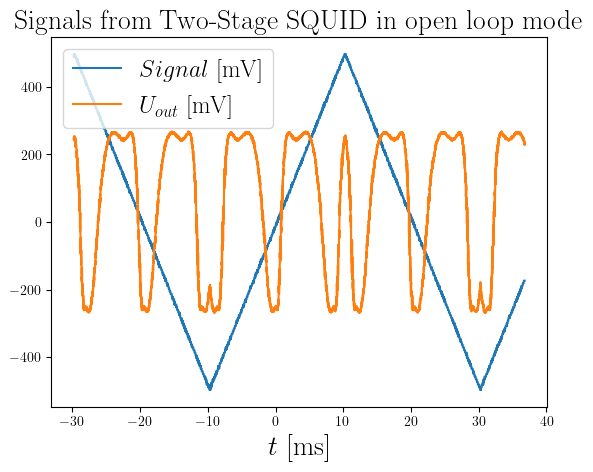

In [545]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
u_out = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]

t_i = 8039
t_f = 16201
plt.plot(time[t_i:t_f],signal[t_i:t_f]*1000, label =r"$Signal$ [mV]")
plt.plot(time[t_i:t_f],u_out[t_i:t_f], label =r"$U_{out}$ [mV]")
plt.title(r"Signals from Two-Stage SQUID in open loop mode", fontsize =20)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [547]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.3/Spectrum/Spectrum_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Frequency     Channel C
        (MHz)         (dBV)
0  0,00000000  -47,80024000
1  0,00023842  -50,76292000
2  0,00047684  -58,74775000
3  0,00071526  -68,02427000
4  0,00095367  -68,48038000

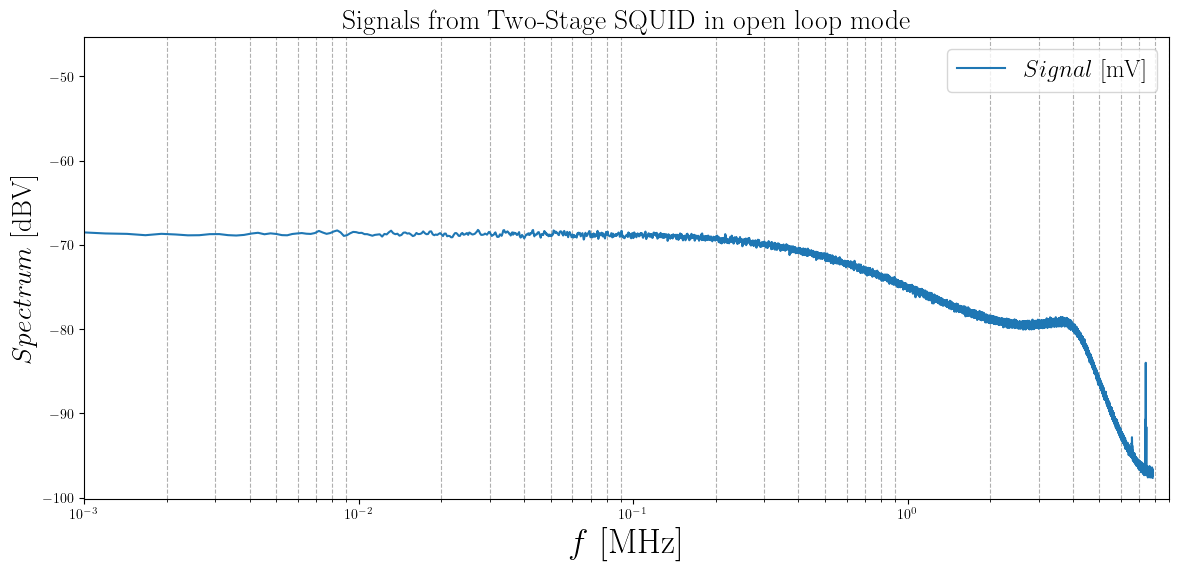

In [581]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]

plt.figure(figsize=(14,6))
plt.grid(visible = True, which = 'major', linewidth=1.3)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.plot(time,signal, label =r"$Signal$ [mV]")
plt.title(r"Spectrum of Two-Stage SQUID in open loop mode", fontsize =20)
plt.ylabel(r"$[dBV]", fontsize = 20)
plt.xlabel(r"$f$ [MHz]", fontsize = 25)
plt.xscale("log")
plt.xlim(0.001,9)
plt.legend( fontsize='xx-large', loc = 'best')
plt.grid()
plt.show()

In [755]:
import numpy as np

# Example array
arr = np.array([4, 2, 7, 1, 8, 1, 6, 3])

# Find the indices of the two smallest elements
min_indices = np.argpartition(arr, 2)[:2]

# Sort the indices to ensure the first minimum comes first
sorted_min_indices = min_indices[np.argsort(arr[min_indices])]

first_min_idx = sorted_min_indices[0]
second_min_idx = sorted_min_indices[1]

print(f"First minimum index: {first_min_idx}, value: {arr[first_min_idx]}")
print(f"Second minimum index: {second_min_idx}, value: {arr[second_min_idx]}")


First minimum index: 3, value: 1
Second minimum index: 5, value: 1
